<a href="https://colab.research.google.com/github/AYBUcode/CENG442/blob/main/W2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
f = open('/content/drive/My Drive/_CENG442/WordEmbeddings/data/hurriyet.txt', 'r', encoding='utf-8')
data = f.read()

In [4]:
sentences = data.split('\n')

In [5]:
tokens = []
for sentence in sentences:
  tokens.append(sentence.split(' '))

In [6]:
print(tokens[:10])

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi', ''], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı', ''], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar', ''], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu', ''], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü', ''], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı', ''], ['öte', 'yandan', 'iran', 'haber', 'ajansı',

In [7]:
%%time
model = Word2Vec(tokens, vector_size=100, window=5, min_count=5, sg = 1)

CPU times: user 5min 48s, sys: 401 ms, total: 5min 48s
Wall time: 1min 58s


In [8]:
model.wv['bakü']

array([-0.54653805,  0.86319476, -0.2867717 , -0.6141506 ,  0.26964545,
       -0.33198076, -0.10602397,  0.36297843,  0.5387269 , -0.02220936,
       -0.07488205, -0.4079408 ,  0.0831537 , -0.13824648, -0.38368642,
       -0.40576512,  0.3359624 , -0.8183268 ,  0.46351177, -0.4711606 ,
        0.08857927,  0.01479182,  0.26370782,  0.05176068, -0.41239107,
        0.04835552,  0.02096973, -0.49762434,  0.17982298,  0.02743317,
        0.31291932,  0.16690877, -0.04679613,  0.02536806, -0.47916788,
        0.25721028, -0.12544699, -0.18596725, -0.17591307, -0.8369018 ,
        0.09036357,  0.17878136,  0.2941833 ,  0.5787914 , -0.24696153,
        0.0328554 , -0.17145771,  0.17694469,  0.15988913,  0.41812938,
       -0.21624126, -0.2469924 , -0.57198244, -0.64302516, -0.06848314,
        0.00296952, -0.3526262 ,  0.01444054,  0.08289319, -0.5728105 ,
       -0.29006502,  0.3045259 ,  0.38000065, -0.3150611 ,  0.10257918,
       -0.25534078,  0.15944837,  0.6033515 , -0.6861784 , -0.06

In [11]:
model.wv.most_similar('azerbaycan')

[('ermenistan', 0.8848831653594971),
 ('karabağ', 0.7572548985481262),
 ('gürcistan', 0.7422584891319275),
 ('aliyev', 0.7253757119178772),
 ('serj', 0.7209238409996033),
 ('azeri', 0.7097316384315491),
 ('kelbecer', 0.6990893483161926),
 ('hasanov', 0.6985568404197693),
 ('oganyan', 0.6982322931289673),
 ('sarkisyan', 0.6920871734619141)]

In [ ]:
model.save('/content/drive/My Drive/_CENG442/WordEmbeddings/data/hurriyet.model')

In [ ]:
model = Word2Vec.load('/content/drive/My Drive/_CENG442/WordEmbeddings/data/hurriyet.model')

In [12]:
def tsnePlot_drawer(mdoel, word):
  tsne = TSNE(n_components=2)
  vectors = np.empty((0, 100))
  words = [word]

  similar_words = model.wv.most_similar(word)

  vectors = np.append(vectors, np.array([model.wv[word]]), axis=0)


  for w, _ in similar_words:
    words.append(w)
    vectors = np.append(vectors, np.array([model.wv[w]]) , axis=0)

  tsne = TSNE(random_state=0, perplexity=5)

  Y = tsne.fit_transform(vectors)

  x_coordinate = Y[:, 0]
  y_coordinate = Y[:, 1]

  plt.scatter(x_coordinate, y_coordinate)

  for label, x, y in zip(words, x_coordinate, y_coordinate):
    plt.annotate(label, xy=(x, y), xytext=(6, -2), textcoords='offset points')
  plt.show()



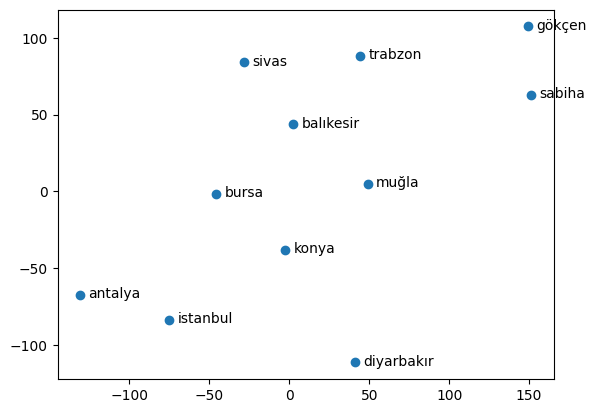

In [19]:
tsnePlot_drawer(model, 'istanbul')